<div style="color:#00BFFF">

# Nowcasting Consumer Expenditure: 

### Load, Clean and Preprocess Data

<div style="color:#00BFFF">

---

##### About the Data

<div style="color:#FF7F50">

**Primary Dataset Description**
</div>

**Short Description:** The primary dataset is "Table 1.1.5. Gross Domestic Product" from the U.S. Bureau of Economic Analysis. It comprises seasonally adjusted quarterly U.S. Gross Domestic Product (GDP) rates in billions of dollars.

**Relevance:** The dataset's detailed information on U.S. GDP over several years is integral to the project's goal of nowcasting consumption. The data's granularity and time-series nature will allow for comprehensive analysis and identification of trends, making it pivotal for the project's success.

**Data frequency:** The data reflecting the economic output of the United States is crucial for analyzing economic trends and growth patterns. The presentation of data is done quarterly by the GDP component.

**Location:** Available at [U.S. Bureau of Economic Analysis](https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&categories=survey&_gl=1*j1lvlb*_ga*MTk0MDMyMjk0MC4xNzA1NDk1NTk4*_ga_J4698JNNFT*MTcwNTQ5NTU5OC4xLjEuMTcwNTQ5NzA2MC42MC4wLjA.#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDMsM10sImRhdGEiOltbImNhdGVnb3JpZXMiLCJTdXJ2ZXkiXSxbIk5JUEFfVGFibGVfTGlzdCIsIjUiXSxbIkZpcnN0X1llYXIiLCIxOTQ3Il0sWyJMYXN0X1llYXIiLCIyMDIzIl0sWyJTY2FsZSIsIi05Il0sWyJTZXJpZXMiLCJRIl1dfQ==). ([BEA](https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&categories=survey&_gl=1*j1lvlb*_ga*MTk0MDMyMjk0MC4xNzA1NDk1NTk4*_ga_J4698JNNFT*MTcwNTQ5NTU5OC4xLjEuMTcwNTQ5NzA2MC42MC4wLjA.#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDMsM10sImRhdGEiOltbImNhdGVnb3JpZXMiLCJTdXJ2ZXkiXSxbIk5JUEFfVGFibGVfTGlzdCIsIjUiXSxbIkZpcnN0X1llYXIiLCIxOTQ3Il0sWyJMYXN0X1llYXIiLCIyMDIzIl0sWyJTY2FsZSIsIi05Il0sWyJTZXJpZXMiLCJRIl1dfQ==))

**Format:** CSV

**Access Method:** The dataset is readily available and can be easily accessed and downloaded directly from the U.S. Bureau of Economic Analysis website.


<div style="color:#FF7F50">

**Secondary Datasets**
</div>

**Federal Reserve Economic Data (FRED)**

**Short Description:** This dataset is sourced from the Federal Reserve Bank of St. Louis's FRED macroeconomic database. It contains a variety of economic data points available at monthly intervals, with a particular focus on US GDP data. The data covers consumer spending indicators, a crucial component of the Gross Domestic Product (GDP).

**Relevance**: Complements the primary dataset with additional economic indicators, useful for cross-referencing and correlation analysis.

**Data frequency:** The monthly frequency of this dataset provides a more detailed temporal resolution than the primary dataset, which may reveal more immediate economic trends. This granularity will be useful in identifying more immediate proxies for nowcasting.

**Estimated Size**: 0.6MB

**Location**: https://research.stlouisfed.org/econ/mccracken/fred-databases/

**Format**: CSV.

**Access Method**: Direct download.

<div style="color:#00BFFF">

---

##### Setup Environment and import libraries

In [1]:
# Activate the virtual environment by running in terminal: 
# python -m venv myenv
# source myenv/bin/activate
# ! source /myenv/bin/activate

# ------- PIP INSTALLS -------
# ! pip install --upgrade pip
# ! pip install -r requirements.txt

# Run the imports file
%matplotlib inline

In [2]:
# ------- Standard Library Imports -------
import warnings
from pprint import pprint
# from typing import List

# ------- Third-Party Library Imports -------
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt

# Remove warnings
warnings.filterwarnings('ignore')

# Set the display options
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  

/var/folders/30/bhymp02j1fb47cmvs80_1b4m0000gn/T/ipykernel_90403/615382996.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<div style="color:#00BFFF">

---

##### Load and preprocesses BEA Dataset


This section focuses on loading the Personal Consumption Expenditures (PCE) data sourced from the Bureau of Economic Analysis (BEA). Our objective is to preprocess and analyze the data to uncover insights into trends in personal consumption within the United States.

<div style="color:#FF7F50">

**Data Source**
</div>

The PCE data is retrieved from a CSV file provided by the BEA:

- **File Path:** `./data/bea/bea_usgdp.csv`

<div style="color:#FF7F50">

**Data Preparation and Preprocessing**
</div>

To ensure the data's quality and usability for analysis, we perform several preprocessing steps using custom utilities from the `utils.bea_load_data` module. These steps include:

1. **Loading and Preprocessing the Data**: The initial step involves loading the GDP data and applying preliminary preprocessing to clean and structure the dataset for analysis.

2. **Creating a Hierarchy for PCE Data**: To better understand the data, we create a hierarchical structure for GDP components and subcomponents that categorizes the information, making it easier to navigate and analyze.

3. **Creating Short Descriptions for PCE Data**: Short descriptions are generated for each data point to provide concise summaries, enhancing readability and understanding.


4. **Extracting PCE Data**: We focus our analysis specifically on PCE data by filtering the dataset to include only entries with 'PCE' in their short descriptions.

5. **Transforming Date Formats**: The date formats are standardized to facilitate time series analysis and ensure consistency across the dataset.

6. **Saving the Processed Data**: After preprocessing, the refined PCE dataset is saved to a CSV file for further analysis or reporting:




In [3]:
from utils.bea_load_data import load_and_preprocess_gdp_data,create_structured_description, create_short_description, transform_date_formats

file_path = './data/bea/bea_usgdp.csv'

# Load and preprocess the data
pce_df = load_and_preprocess_gdp_data(file_path)

# create hierarchy for PCE data
pce_df = create_structured_description(pce_df)

# create short description for PCE data
pce_df = create_short_description(pce_df)

#extract only PCE data
pce_df = pce_df[pce_df['short_description'].str.contains('PCE')]

# Transform the date formats
pce_df = transform_date_formats(pce_df)

#save the data
pce_df.to_csv('./results/bea/bea_pce_original.csv', index=True)

In [4]:
pce_df.head()

short_description,PCE,PCE_Goods,PCE_Goods_Durable_goods,PCE_Goods_Nondurable_goods,PCE_Services
1947Q1,156.2,95.6,20.7,74.9,60.6
1947Q2,160.0,98.2,21.4,76.9,61.8
1947Q3,163.5,100.4,21.8,78.6,63.1
1947Q4,167.7,103.5,23.5,80.0,64.2
1948Q1,170.4,105.1,23.5,81.5,65.3


<div style="color:#00BFFF">

---

##### Statistical Analysis and Visualization of PCE Data


The goal of this section is to inspect the Personal Consumption Expenditures (PCE) data to understand its distribution, identify outliers, and analyze its trend over time. This involves calculating the median, interquartile range (IQR), detecting outliers, and examining the rate of change across different periods.

<div style="color:#FF7F50">

**Rate of Change**: 

To analyze trends, the rate of change is a crucial metric. It is calculated using the formula:

$$
\text{Rate of Change} = \left( \frac{\text{Current Value} - \text{Previous Value}}{\text{Previous Value}} \right) \times 100\%
$$


This calculation is efficiently performed using the `pct_change()` function in pandas, followed by multiplying the result by 100 to express it as a percentage.

<div style="color:#FF7F50">

**Plotting the Data**

For a comprehensive analysis, we plot the data focusing on the extended range, IQR, and outliers. A custom function `analyze_and_plot` is defined to standardize datetime indices, compute relevant statistics, and visualize the results.

The `analyze_and_plot` function is stored in a subfolder `utils/visualisation` for better organization. It is then imported and executed by importing the file `from utils.visualisation import analyze_and_plot` and calling it with `analyze_and_plot(pce_df, 'PCE')`

<div style="color:#FF7F50">

**Function Overview**

This function includes steps to standardize the datetime index, accommodating different date formats and ensuring consistency for time series analysis. It is designed to handle quarterly data and convert it to a standard datetime format for ease of analysis.

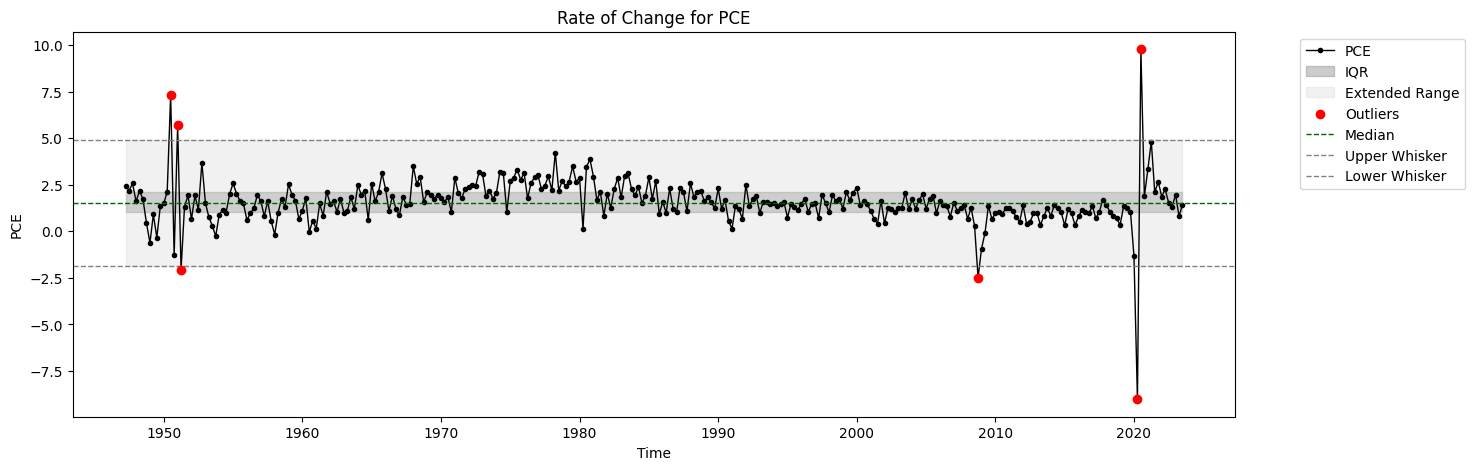

In [5]:
from utils.visualisation import analyze_and_plot

# Call the function from utils/visualisations and store the result in result
result = analyze_and_plot(pce_df,'PCE')

<div style="color:#FF7F50">

**Implementation**
</div>

By executing the above steps, we gain valuable insights into the PCE data's behavior over time, its variability, and any potential outliers that may influence further analysis. 

Our analysis of Personal Consumption Expenditures (PCE) data reveals notable periods of outliers and volatility, alongside consistent trends within the Interquartile Range (IQR) from 1950 to the present. These observations offer insights into consumer spending behavior under varying economic conditions:

- **1950s:** The post-World War II economic boom led to a significant rise in consumer spending, with PCE outliers reflecting the era’s prosperity and confidence.
- **1980:** Economic policies to combat the early 1980s recession caused fluctuations in PCE, mirroring the impacts of high inflation and unemployment on consumer spending.
- **2008:** The financial crisis resulted in a sharp PCE decline, highlighting the effect of economic downturns on consumer confidence and expenditure.
- **COVID-19 Pandemic:** The pandemic's onset disrupted PCE patterns drastically, with immediate impacts from lockdowns and shifts in consumer priorities.

Outside these periods, the PCE line graph generally remains within the IQR, indicating relative stability in consumer spending amidst the evolving economic landscape. This stability, punctuated by periods of significant deviation, underscores the dynamic interplay between consumer behavior and macroeconomic factors. 

<div style="color:#00BFFF">

---

##### Loading the FRED data

In this section of the analysis, we are incorporating secondary datasets from the Federal Reserve Economic Data (FRED) to enrich our examination of Personal Consumption Expenditures (PCE). The FRED datasets are pivotal for comparing a wide array of economic variables against PCE, facilitating a comprehensive macroeconomic analysis.

<div style="color:#FF7F50">

**Dataset Overview**

</div>

Federal Reserve Bank of St. Louis's FRED database. The dataset includes 123 monthly economic indicators, focusing on US GDP and consumer spending variables—key components of GDP. This dataset complements our primary PCE data by providing additional economic indicators for a multifaceted analysis. Monthly updates offer detailed insights into short-term economic trends and consumer behavior.

<div style="color:#FF7F50">

**Data Loading Procedure**
</div>

The `load_fredmd_data` function is designed to perform the following actions:

1. **Download Data:** Retrieves the latest version `current` of the FRED-MD dataset based on the specified `vintage`, ensuring our analysis is grounded on the most current data.
2. **Preprocess Data:** Processes the dataset by extracting transformation codes, mapping short names to descriptions, and setting observation dates as the index, which is crucial for time-series analysis.
3. **Save Processed Data:** The preprocessed dataset is then saved for subsequent analysis, with the observation date index facilitating easy access to specific time periods.

In [6]:
def load_fredmd_data(vintage):
    """
    Loads and processes the FRED-MD data.
    """
    # Define the base URL for the FRED-MD dataset
    base_url = 'https://files.stlouisfed.org/files/htdocs/fred-md'

    # Load the dataset for the specified 'vintage', dropping rows that are entirely NA
    fred_orig = pd.read_csv(f'{base_url}/monthly/{vintage}.csv').dropna(how='all')

    # Extract transformation codes (second column onwards) from the first row
    transform_info = fred_orig.iloc[0, 1:]

    # Drop the first row (containing transformation info) from the dataset
    fred_orig = fred_orig.iloc[1:]

    # Convert 'sasdate' column to a PeriodIndex with monthly frequency for time-series analysis
    fred_orig.index = pd.PeriodIndex(fred_orig.sasdate.tolist(), freq='M')

    # Remove the 'sasdate' column as it's now set as the index
    fred_orig.drop('sasdate', axis=1, inplace=True)

    # Return the processed data and the transformation information
    return fred_orig, transform_info


# Load data for the current vintage and unpack into original data and transformation info
fred, transform_info = load_fredmd_data("current")

# Save the original data
fred.to_csv('./results/fred/fred_monthly_orig.csv', index=True)

<div style="color:#FF7F50">

**Implementation**

After loading the data, we further enhance the dataset's usability by mapping column names to their descriptive titles using the `map_column_names` function. This step significantly improves the readability and interpretability of the data for in-depth analysis.

In [7]:
# Function for Column Name Mapping
def map_column_names(data, defn_file):
    """
    Maps FRED-MD column names to their descriptions.
    """
    # Load the definitions file, ignoring encoding errors
    defn = pd.read_csv(defn_file, encoding_errors='ignore')

    # Set the 'fred' column as the index of the definitions DataFrame
    defn.index = defn.fred

    # Filter the definitions to include only those variables present in the data columns
    defn = defn.loc[data.columns.intersection(defn.fred), :]

    # Create a dictionary mapping FRED-MD variable names to their descriptions
    map_dict = defn['description'].to_dict()

    # Replace the names of columns in the dataset with the descriptions from the map
    return data[map_dict.keys()].rename(columns=map_dict),defn

# Map column names for fred_original 
column_defn_file = './data/FRED/FRED_Definitions_Mapping/fredmd_definitions.csv'
fred_orig,defn = map_column_names(fred, column_defn_file)

fred_orig.tail(5)

,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Consumer Goods,New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Sentiment Index,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
2023-08,19098.603,15707.7,116.171,1497717.0,699540.0,103.24

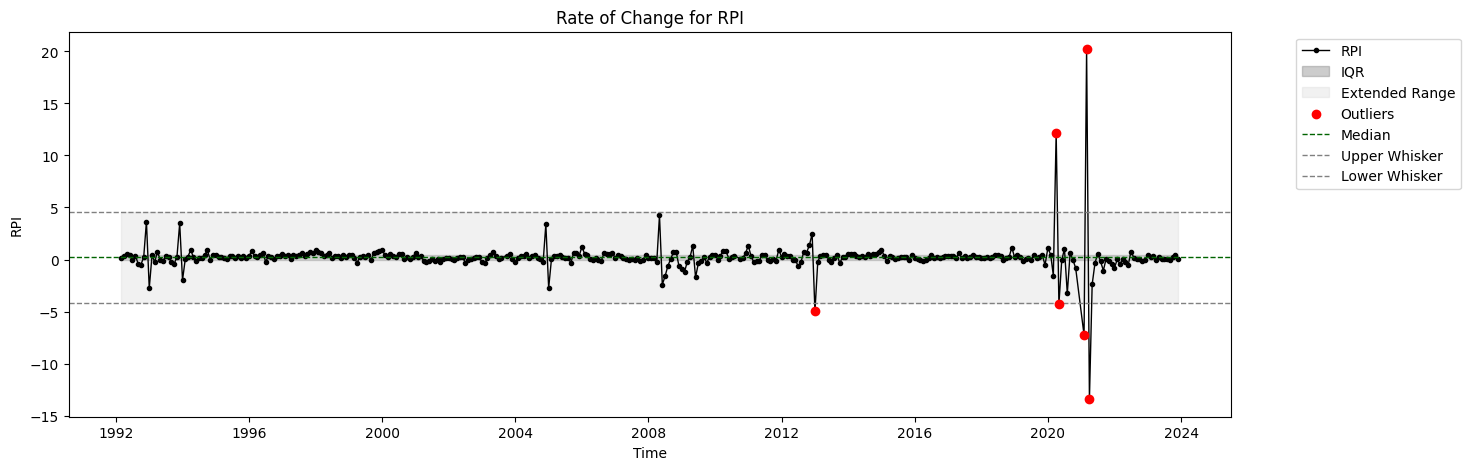

In [8]:
#Analyse and Plot a few indicators to inspect the data using the function from utils/visualisations

analyze_and_plot(fred,'RPI')
# analyze_and_plot(fred,'INDPRO')
# analyze_and_plot(fred,'UNRATE')
# analyze_and_plot(fred,'UMCSENTx')

<div style="color:#00BFFF">

---

##### Frequency Alignment: 

In this section of the notebook, we address the challenge of aligning the frequencies of two datasets: the BEA dataset, from which we've extracted the PCE column, and the FRED database. The goal is to ensure that the data from these sources can be directly compared by matching their temporal resolution.

<div style="color:#FF7F50">

**Frequency Alignment for Comparative Analysis**
</div>

After the initial steps of loading, cleaning, and extracting relevant columns from both datasets, we encounter a fundamental challenge: the datasets are indexed by different time frequencies. Specifically, the FRED database is organized monthly, while our PCE data from the BEA dataset follows a quarterly format. To bridge this gap, we implement a strategy to align their frequencies, facilitating a coherent and meaningful comparison.

<div style="color:#FF7F50">

**Code Implementation**
</div>

To achieve this alignment, we introduce a function `transform_to_quarterly` that converts monthly dates into the quarterly 'YYYYQX' format. This transformation involves selecting only the last month of each quarter (March, June, September, and December) from the FRED dataset, as these months effectively represent the quarter's economic activity.


In [9]:
# Function to transform monthly date to quarterly date in 'YYYYQX' format
def transform_to_quarterly(date_str):
    year, month = date_str.split('-')
    quarter = (int(month) - 1) // 3 + 1
    return f"{year}Q{quarter}"


We then apply this function to the FRED dataset, filtering for the end months of each quarter and converting the index to the quarterly format. This process not only standardizes the temporal resolution but also creates a new 'Quarter' column, which is then set as the new index.

In [10]:

# Convert index to string to apply string methods
fred_orig.index = fred_orig.index.astype(str)

# Selecting only the last month of each quarter from the monthly dataset
# The last month of each quarter are March (03), June (06), September (09), December (12)
fred_orig_filtered = fred_orig[fred_orig.index.str.endswith(('03', '06', '09', '12'))]

# Transform the index to the quarterly format and create a new 'Quarter' column
fred_orig_filtered['Quarter'] = fred_orig_filtered.index.map(transform_to_quarterly)

# Set the new 'Quarter' column as the index
fred_orig_filtered.set_index('Quarter', inplace=True)

Finally, we compare the date ranges of the transformed FRED dataset and the PCE dataset to ensure they align properly for subsequent analyses.

In [11]:
# Checking the date range of the monthly dataset
monthly_date_range = fred_orig_filtered.index.min(), pce_df.index.max()

# Checking the date range of the PCE dataset
pce_date_range = pce_df.index.min(), pce_df.index.max()

monthly_date_range, pce_date_range

(('1959Q1', '2023Q3'), ('1947Q1', '2023Q3'))

<div style="color:#00BFFF">

---

##### Quarterly Data Integration

Finally We will merge quarterly BEA PCE rate of change data framework with the FRED transformed quarter-over-quarter rate of change into a unified framework using pandas, ensuring seamless integration and compatibility. 

This step is vital for consolidating different economic indicators into a single, comprehensive analysis.

In [12]:
# drop columns PCE_Goods	PCE_Goods_Durable_goods	PCE_Goods_Nondurable_goods	PCE_Services
pce_df.drop(['PCE_Goods', 'PCE_Goods_Durable_goods', 'PCE_Goods_Nondurable_goods', 'PCE_Services'], axis=1, inplace=True)

#drop rows in pce_df that are not in fred_orig_filtered
pce_df = pce_df[pce_df.index.isin(fred_orig_filtered.index)]

# Merging the datasets on the 'Quarter' column
joined_dataset = pd.merge(pce_df, fred_orig_filtered, left_index=True, right_index=True, how='left')

# Display the first few rows of the merged dataset
# joined_dataset.head()

<div style="color:#00BFFF">

---

##### Filter Date Range

<div style="color:#FF7F50">

**Converting Index to Datetime**
</div>

Our dataset uses a 'YYYYQX' format for indexing, representing years and quarters. To facilitate time series analysis, we use the `convert_index_to_datetime` function. This function checks if the index is already in the pd.Timestamp format, and if not, it converts the 'YYYYQX' format into a datetime object. This conversion process breaks down the index into year and quarter components, calculates the corresponding month, and constructs a proper datetime object.

In [13]:
def convert_index_to_datetime(index):
        """Convert 'YYYYQX' format to datetime, or return the input if it's already a datetime."""
        
        if isinstance(index, pd.Timestamp):
            return index  # Return the input directly if it's already a Timestamp
        
        year = int(index[:4])
        quarter = int(index[5])
        month = (quarter - 1) * 3 + 1  # Convert quarter to month
        
        return pd.Timestamp(year=year, month=month, day=1)

<div style="color:#FF7F50">

**Filtering Data for Analysis**
</div>

Once the index is in datetime format, we filter our dataset to include only the observations from the year 1960 onwards. This step narrows down our analysis to a specific period, allowing us to focus on more contemporary trends and patterns.

In [14]:

# Ensure the index is in datetime format
joined_dataset.index = pd.to_datetime(joined_dataset.index.map(convert_index_to_datetime))

# Now, filter the data to include only observations from 1960 onwards
joined_dataset = joined_dataset[joined_dataset.index.year >= 1960]

<div style="color:#00BFFF">

---

##### Inspecting Data: Visualisations plotting random Indicators on line graph for inspection

In this section of our analysis, we explore the functionality of the `plot_dataset` function, a versatile tool for visual inspection of various economic indicators over time. This function is part of our utility suite in the `utils/visualisation` folder and plays a crucial role in our iterative analysis process.

<div style="color:#FF7F50">

**Function Overview**
</div>

The `plot_dataset` function is designed for repeated use, allowing for dynamic exploration of different datasets or subsets thereof. Its primary purpose is to visually inspect the temporal evolution of economic indicators, including any transformations applied to the dataset.

<div style="color:#FF7F50">

**Key Features**
</div>

- **Dynamic Index Conversion:** The function accommodates indices in the 'YYYYQX' format, converting them into datetime objects for proper time series plotting. This feature ensures compatibility with datasets indexed by quarters.

- **Random Column Selection:** To facilitate a broad yet manageable inspection, the function randomly selects three columns for plotting alongside the PCE (Personal Consumption Expenditures) indicator. This approach provides a snapshot of the dataset's overall behavior without overwhelming the user with too much information at once.

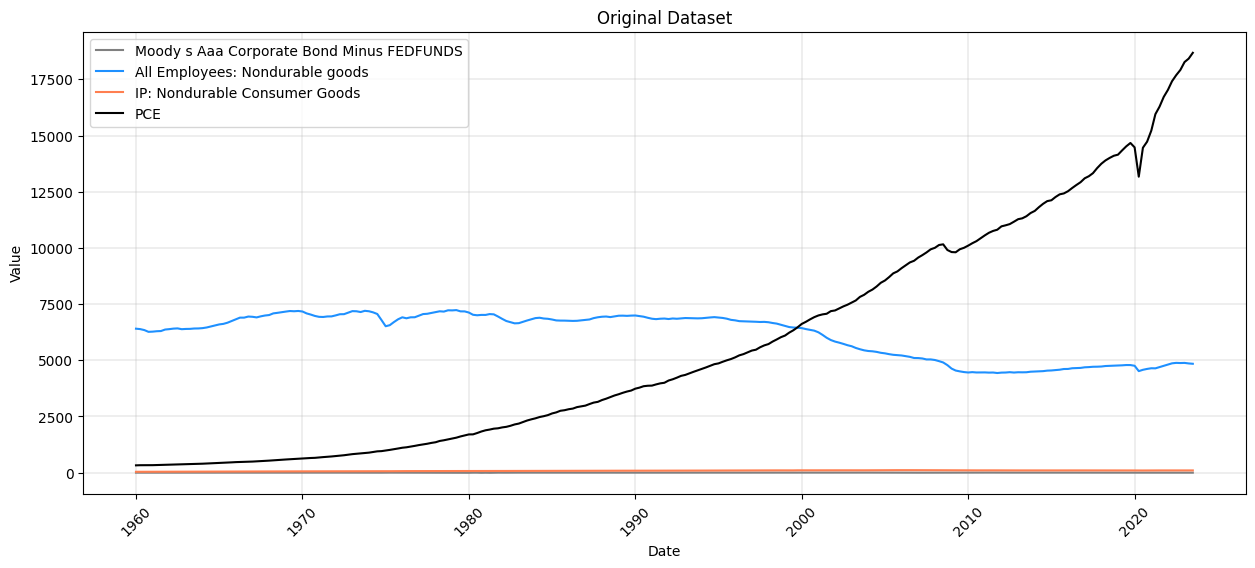

In [15]:
from utils.visualisation import plot_dataset

#plot after each transformation can run iteratively to see the changes
plot_dataset(joined_dataset, "Original Dataset")

<div style="color:#00BFFF">

---

##### Inspecting and Handling Missing Values

In this section of our notebook, we tackle the critical step of inspecting and handling missing values within our dataset. Dealing with NaNs (Not a Number values) in economic data requires careful consideration due to the potential implications on analysis and interpretation.

<div style="color:#FF7F50">

**Inspecting Missing Values**
</div>

- To start, we utilize the `report_missing_values` function to systematically identify and report columns within our dataset that contain missing values. 

- This function calculates the total count of NaNs in each column and prints a summary of those columns where NaNs are present, along with the count of missing values. 

- This initial inspection is crucial for understanding the extent and distribution of missing data across our dataset.

In [16]:
def report_missing_values(df):
    # Check for NaN values in the dataset
    nan_summary = df.isna().sum()

    # Display columns with NaNs and their count, if any
    columns_with_nans = nan_summary[nan_summary > 0]
    if not columns_with_nans.empty:
        print("\nColumns with NaN values and their count:")
        print(columns_with_nans)
    else:
        print("\nNo NaN values found.")

report_missing_values(joined_dataset)


Columns with NaN values and their count:
New Orders for Consumer Goods                         128
New Orders for Nondefense Capital Goods                32
S&P s Composite Common Stock: Dividend Yield            1
S&P s Composite Common Stock: Price-Earnings Ratio      1
Consumer Sentiment Index                               72
dtype: int64


<div style="color:#FF7F50">

**Handling Missing Values**
</div>

Given the sensitive nature of economic data, where each variable can hold significant analytical value, it's essential to approach the handling of NaNs judiciously. 

- Our strategy involves dropping columns that exceed a certain threshold of missing values, which we've set at 30.
  
- This threshold is chosen based on a balance between retaining as much data as possible and ensuring the reliability of our analysis. 

- We can see that New Orders for Consumer Goods, New Orders for Nondefense Capital Goods and Consumer Sentiment Index have passed that threshold and we have decided to drop these. 

The `drop_columns_with_many_nans` function implements this strategy. 

- It first calculates the total number of NaNs per column, identifies those columns where the count exceeds our threshold, and subsequently drops these columns from the dataset. 

- This process helps in maintaining the integrity of our dataset by focusing on more complete datasets, while also acknowledging the reality that some level of missing data is often unavoidable in large economic datasets.

In [17]:
def drop_columns_with_many_nans(df, threshold=30):
    """
    Drops columns from the dataframe that have more than a specified number of NaN values.
    """

    # Calculate the count of NaN values per column
    nan_counts = df.isna().sum()
    
    # Identify columns that exceed the threshold for NaN values
    columns_to_drop = nan_counts[nan_counts > threshold].index
    
    # Drop these columns from the dataframe
    df_dropped = df.drop(columns=columns_to_drop)
    
    # Optionally, print the names of dropped columns for review
    if len(columns_to_drop) > 0:
        print(f"Dropped {len(columns_to_drop)} columns with more than {threshold} NaN values:")
        print(columns_to_drop.tolist())
    else:
        print("No columns were dropped based on the threshold criteria.")
    
    return df_dropped


joined_dataset = drop_columns_with_many_nans(joined_dataset, threshold=30)


Dropped 3 columns with more than 30 NaN values:
['New Orders for Consumer Goods', 'New Orders for Nondefense Capital Goods', 'Consumer Sentiment Index']


<div style="color:#00BFFF">

---

##### Inspect and Handle Outliers

In this section, we identify and handle outliers within our dataset. 

Outliers, which represent data points significantly different from the rest of the data, can skew our analysis and lead to misleading conclusions. Therefore, it is imperative to address them appropriately.

<div style="color:#FF7F50">

**Outlier Detection and Handling Strategy**
</div>

Our strategy for identifying and handling outliers involves a statistical approach based on the Z-score method. 

This method assesses how far away a data point is from the mean in terms of standard deviations. A common threshold to identify outliers is a Z-score greater than 3, indicating that the data point is significantly distant from the bulk of the data.

In [18]:
def handle_outliers(df, column):
    
    outlier_values = pd.DataFrame()
    # Z-score method for dollar values and indexes
    z = np.abs((df[column] - df[column].mean()) / df[column].std())
    threshold = 3  # Typically, a threshold of 3 is used
    mask = z > threshold
    outlier_values = df.loc[mask, column].reset_index()
    df.loc[mask, column] = np.nan

    return df, outlier_values

<div style="color:#FF7F50">

**Applying the Outlier Handling Function**
</div>

We systematically apply the `handle_outliers` function across our dataset, focusing on each column individually. 

<div style="color:#FF7F50">

**Review and Analysis of Outliers**
</div>

After handling outliers across all columns, we compile our findings into a structured format, presenting a summary of columns affected by outliers along with the count of outliers removed. 

In [19]:

# Initialize a dictionary to store outlier data for each column
columns_with_outliers = {}

# Loop through each column in joined_dataset and apply the outlier handling function
for column in joined_dataset.columns:
    # Get the measure type for the column
    joined_dataset, outliers = handle_outliers(joined_dataset, column)
        
    # Store the outliers if any
    if not outliers.empty:
        #add to dictionary columns_with_outliers
        columns_with_outliers[column] = outliers.count()[1]

# convert dictionary to dataframe and sort by number of outliers
columns_with_outliers = pd.DataFrame.from_dict(columns_with_outliers, orient='index', columns=['outliers']).sort_values(by='outliers', ascending=False)
print(columns_with_outliers)

                                                    outliers
M1 Money Stock                                            14
Civilians Unemployed - 15 Weeks & Over                     9
Civilians Unemployed for 27 Weeks and Over                 9
Help-Wanted Index for United States                        8
S&P s Common Stock Price Index: Industrials                7
S&P s Common Stock Price Index: Composite                  6
5-Year Treasury C Minus FEDFUNDS                           6
1-Year Treasury C Minus FEDFUNDS                           6
Total Reserves of Depository Institutions                  5
All Employees: Mining and Logging: Mining                  5
Average Duration of Unemployment (Weeks)                   5
Ratio of Help Wanted/No. Unemployed                        5
Reserves Of Depository Institutions                        5
6-Month Treasury C Minus FEDFUNDS                          4
3-Month Treasury C Minus FEDFUNDS                          4
6-Month Treasury Bill:  

<div style="color:#00BFFF">

---

##### Unit conversion

<div style="color:#FF7F50">

**Understanding Measure Types**
</div>

Before we move further we need to establish a clear understanding of the different types of measures present in our dataset. 

This understanding is crucial for further analysis as the analysis method may vary depending on the nature of the data (e.g., dollar values, indexes). 

To facilitate this, we create a mapping of FRED-MD variable names to their corresponding measure types, enhancing our dataset with a comprehensive categorization of each variable. This mapping includes an additional entry for "PCE" (Personal Consumption Expenditures), classified under 'billions of dollars'.

<div style="color:#FF7F50">

**Ensure consistent data scales** by standardizing measurement units across economic indicators.
</div>

1. **Import Metadata**
   - Load variable metadata from `fredmd_information.csv` and convert to a dictionary mapping variable descriptions to measurement units.

2. **Update Measurement Info**
   - Manually add measurement info for **PCE** as 'billions of dollars'.
   - Create a DataFrame to display measurement units for each variable which facilitates understanding of data scale and units.

In [20]:
# Create a dictionary mapping FRED-MD variable names to their descriptions
measuremnet_info = pd.read_csv('./data/fredmd_information.csv')
measure_type_dict = measuremnet_info.set_index('description')['measure'].to_dict()

# Add "PCE": 'billions of dollars' to the dictionary
measure_type_dict["PCE"] = 'billions of dollars'

#display the measure types in a dataframe
unique_measures = pd.DataFrame.from_dict(measure_type_dict, orient='index', columns=['measure'])
unique_measures.measure.unique()

array(['avg dollars per hour', 'avg hours', 'avg no of weeks',
       'billions of 1982-84 dollars), deflated by cpi',
       'billions of 2012 dollars), deflated by core pce',
       'billions of chained 2012 dollars', 'billions of dollars',
       'billions of dollars, adjusted for inflation and excluding government transfer payments.',
       'exchange rate', 'index = 100',
       'millions of 2012 dollars, deflated by core pce',
       'millions of chained 2012 dollars', 'millions of dollars',
       'thousands of persons', 'percent', 'ratio', 'thousands of units',
       'thousands, seasonally adjusted annual rate'], dtype=object)

<div style="color:#FF7F50">

**Standardize Data Scales**
</div>

We first define conversion factors to standardize data (e.g., converting thousands to millions, millions to billions). Then apply to relevant variables to ensure consistent analysis base.

<div style="color:#FF7F50">

**Mapping and Conversion**
</div>

Hereafter we map the dataset columns to their measurement units and apply conversion factors to adjust data scales where necessary.

In [21]:
conversion_factors = {
    # Convert millions to billions
    'millions of dollars': 1e-3,  
    'millions of 2012 dollars, deflated by core pce': 1e-3,  
    'millions of chained 2012 dollars': 1e-3,  
    
    # For non-monetary values, Convert thousands to millions (absolute numbers)
    'thousands of persons': 1e-3,  
    'thousands of units': 1e-3, 
    'thousands, seasonally adjusted annual rate': 1e-3,  
}

# Mapping column names in joined_dataset to their respective measures from defn_dataset
column_measures = {}
for col in joined_dataset.columns:
    if any(defn['fred'] == col):
        matching_rows = defn[defn['description'] == col]
        if not matching_rows.empty:
            measure_value = matching_rows['measure'].iloc[0]
            column_measures[col] = measure_value

# Apply conversion factors
for column, measure in column_measures.items():
    if measure in conversion_factors:
        joined_dataset[column] *= conversion_factors[measure]


<div style="color:#00BFFF">

---

##### Data Normalization

<div style="color:#FF7F50">

**Normalize the Dataset**

</div>

The goal of normalization is to transform the dataset to a common scale without distorting differences in the ranges of values. This process is essential for accurate comparisons and analyses across different economic indicators.

For each variable, we adjust the data such that it has a mean ($\mu$) of zero and a standard deviation ($\sigma$) of one. This standardization technique, often referred to as Z-score normalization, is mathematically represented as follows:

$$Z = \frac{(X - \mu)}{\sigma}$$


Where:

- $X$ is the original value.
- $\mu$ is the mean of the variable.
- $\sigma$ is the standard deviation of the variable.
- $Z$ is the standardized (normalized) value.

<div style="color:#FF7F50">

**Applying Z-Score Normalization**

</div>

- Utilizing the `StandardScaler` from `sklearn.preprocessing`, we apply Z-score normalization to the dataset, focusing on numeric columns. 

- This ensures that each variable contributes equally to the analysis, centering the data around 0 and standardizing the distribution to have a variance of 1. 

- Such normalization is crucial for multivariate analyses, including regression models and other advanced techniques. 


This step effectively prepares the dataset for further statistical modeling and analysis, ensuring that all financial figures are presented in a format that allows for meaningful comparison and interpretation.

In [22]:
# ##### Standardizing rate of change dataframe (Z-Score Normalization) 
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it and applying this only to the numeric columns
scaled_data = scaler.fit_transform(joined_dataset.select_dtypes(include=['float64', 'int64']))

# Create a new DataFrame with the scaled data and the same index and columns
joined_dataset_rate_of_change = pd.DataFrame(scaled_data, index=joined_dataset.index, columns=joined_dataset.select_dtypes(include=['float64', 'int64']).columns)

joined_dataset_rate_of_change.head()

,PCE,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Durable Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
1960-01-01,-1.063975,-1.396111,-1.442889,-1.362974,-1.436477,-1.110122,-1.679889,-1.768871,-1.745929,-2.015088,-1.645203,-2.195028,-1.329201,-1.545693

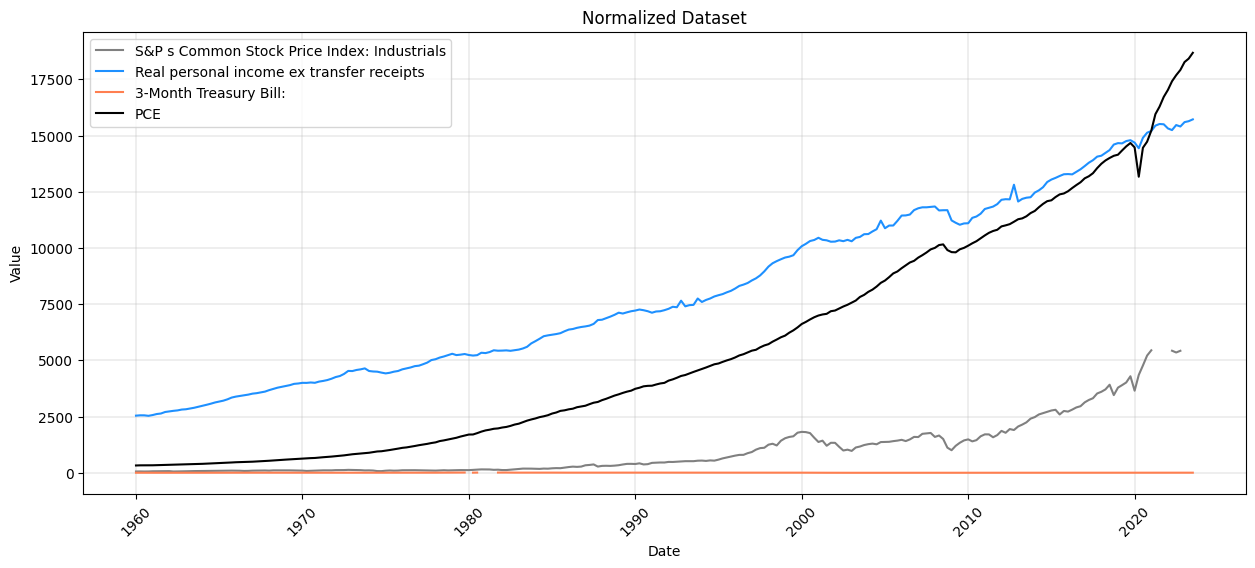

In [27]:
#plot after each transformation
plot_dataset(joined_dataset, "Normalized Dataset")

<div style="color:#00BFFF">

---

##### Save the final cleaned and preprocessed dataframe

In [24]:
# save the data
joined_dataset.to_csv("./results/merged_data/joined_dataset_transformed.csv",index=True)